# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\Jack\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Jack\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Jack\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

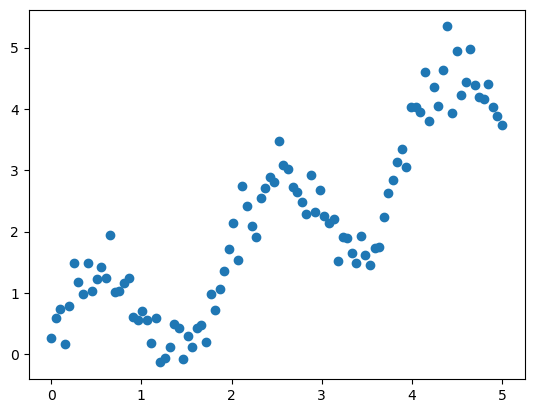

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5886394977540117


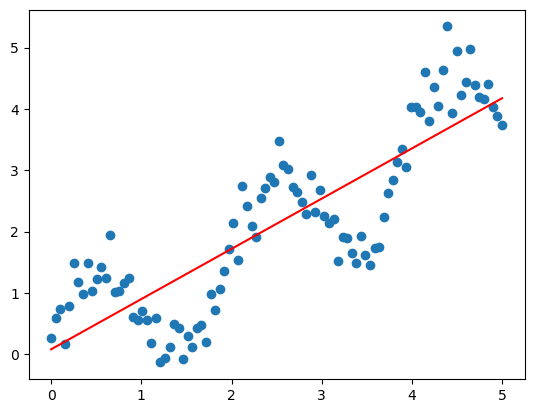

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [9]:
print(x.shape)

(100,)


In [10]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [11]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

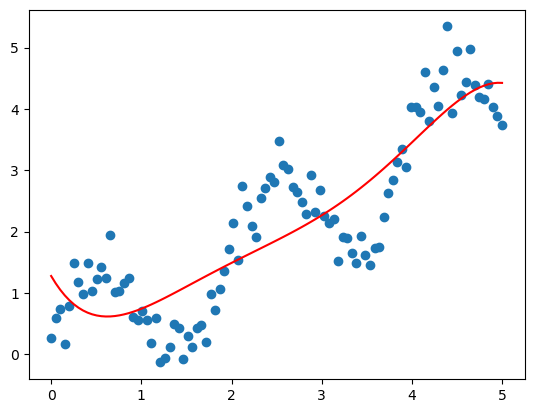

In [13]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.53294647  3.12303556 -1.39158039  0.2891469  -0.02209032]
interception:  1.2755055651697567


In [17]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.27550557, 1.15536769, 1.05011254, 0.9587311 , 0.8802578 ,
       0.8137696 , 0.75838509, 0.71326371, 0.6776048 , 0.65064674,
       0.63166611, 0.61997679, 0.61492913, 0.615909  , 0.62233701,
       0.63366759, 0.6493881 , 0.66901801, 0.692108  , 0.71823909,
       0.74702177, 0.77809513, 0.81112599, 0.84580805, 0.88186095,
       0.9190295 , 0.95708271, 0.99581299, 1.03503525, 1.07458603,
       1.11432263, 1.15412223, 1.19388105, 1.23351344, 1.27295104,
       1.31214188, 1.35104954, 1.38965226, 1.42794205, 1.46592388,
       1.50361475, 1.54104283, 1.57824661, 1.61527401, 1.65218153,
       1.68903335, 1.72590048, 1.76285988, 1.79999359, 1.83738787,
       1.87513231, 1.91331898, 1.95204152, 1.99139433, 2.03147164,
       2.07236668, 2.11417078, 2.15697253, 2.20085687, 2.24590425,
       2.29218975, 2.3397822 , 2.38874333, 2.43912687, 2.4909777 ,
       2.54433099, 2.59921127, 2.65563165, 2.71359286, 2.77308245,
       2.83407388, 2.89652563, 2.96038039, 3.02556414, 3.09198

In [18]:
regr_poly.predict(X_poly)

array([1.27550557, 1.15536769, 1.05011254, 0.9587311 , 0.8802578 ,
       0.8137696 , 0.75838509, 0.71326371, 0.6776048 , 0.65064674,
       0.63166611, 0.61997679, 0.61492913, 0.615909  , 0.62233701,
       0.63366759, 0.6493881 , 0.66901801, 0.692108  , 0.71823909,
       0.74702177, 0.77809513, 0.81112599, 0.84580805, 0.88186095,
       0.9190295 , 0.95708271, 0.99581299, 1.03503525, 1.07458603,
       1.11432263, 1.15412223, 1.19388105, 1.23351344, 1.27295104,
       1.31214188, 1.35104954, 1.38965226, 1.42794205, 1.46592388,
       1.50361475, 1.54104283, 1.57824661, 1.61527401, 1.65218153,
       1.68903335, 1.72590048, 1.76285988, 1.79999359, 1.83738787,
       1.87513231, 1.91331898, 1.95204152, 1.99139433, 2.03147164,
       2.07236668, 2.11417078, 2.15697253, 2.20085687, 2.24590425,
       2.29218975, 2.3397822 , 2.38874333, 2.43912687, 2.4909777 ,
       2.54433099, 2.59921127, 2.65563165, 2.71359286, 2.77308245,
       2.83407388, 2.89652563, 2.96038039, 3.02556414, 3.09198

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [19]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [20]:
sigma = 0.3

In [21]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [22]:
regr_rbf = LinearRegression()

In [23]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

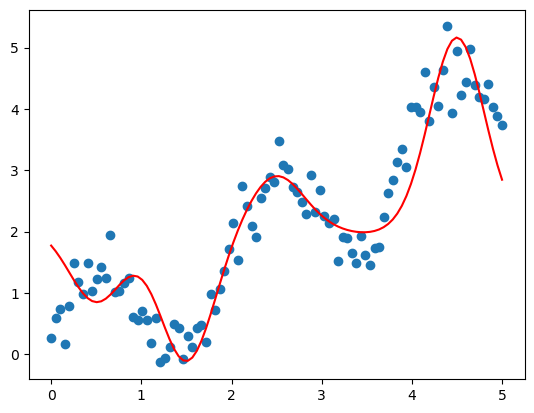

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.2176079  -2.18583593  0.83826598 -0.10041795  3.08938175]
interception:  2.0749310865495727


#### Comparison

In [26]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

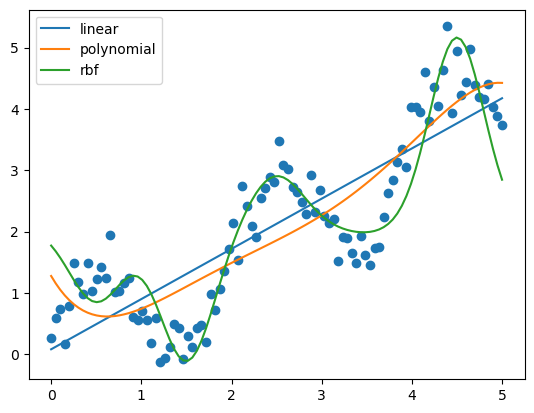

In [27]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [28]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5886394977540117


In [29]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4914512798210069


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.27861962231058596
